In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import matplotlib


matplotlib.rcParams.update({
    'font.family' : 'serif',
    'font.size' : 14.0,
    'lines.linewidth' : 2,
    'lines.antialiased' : True,
    'axes.facecolor': 'fdfdfd',
    'axes.edgecolor': '777777',
    'axes.linewidth' : 1,
    'axes.titlesize' : 'medium',
    'axes.labelsize' : 'medium',
    'axes.axisbelow' : True,
    'xtick.major.size'     : 3,      # major tick size in points
    'xtick.minor.size'     : 3,      # minor tick size in points
    'xtick.major.pad'      : 6,      # distance to major tick label in points
    'xtick.minor.pad'      : 6,      # distance to the minor tick label in points
    'xtick.color'          : '333333', # color of the tick labels
    'xtick.labelsize'      : 'medium', # fontsize of the tick labels
    'xtick.direction'      : 'in',     # direction: in or out
    'ytick.major.size'     : 1,      # major tick size in points
    'ytick.minor.size'     : 1,      # minor tick size in points
    'ytick.major.pad'      : 6,      # distance to major tick label in points
    'ytick.minor.pad'      : 6,      # distance to the minor tick label in points
    'ytick.color'          : '333333', # color of the tick labels
    'ytick.labelsize'      : 'medium', # fontsize of the tick labels
    'ytick.direction'      : 'in',     # direction: in or out
    'axes.grid' : False,
    'grid.alpha' : 0.3,
    'grid.linewidth' : 1,
    'legend.fancybox' : True,
    'legend.fontsize' : 'Small',
    'figure.figsize' : (2.5, 2.5),
    'figure.facecolor' : '1.0',
    'figure.edgecolor' : '0.5',
    'hatch.linewidth' : 0.1,
    'text.usetex' : True
    })

plt.rcParams['text.latex.preamble'] = r'\usepackage{times}'

In [3]:
import sys
sys.path.append('../')

In [4]:
nbody = np.load('../data/Maps_Mtot_Nbody_IllustrisTNG_CV_z=0.00.npy')
nbody = np.array([nbody[i]/nbody[i].mean()  for i in range(nbody.shape[0])])

In [5]:
hydro = np.load('../data/Maps_Mgas_IllustrisTNG_CV_z=0.00.npy')
hydro = np.array([hydro[i]/hydro[i].mean()  for i in range(hydro.shape[0])])

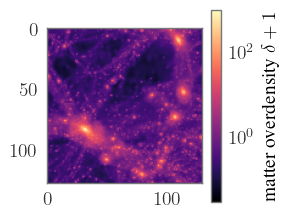

In [6]:
# assuming nbody[0] contains positive data
plt.imshow(nbody[0][95:223,60:188], norm=LogNorm(vmin=nbody[0].min(), vmax=nbody[0].max()), cmap='magma')
plt.colorbar(label='matter overdensity $\delta + 1$')
plt.show()

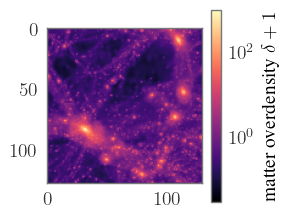

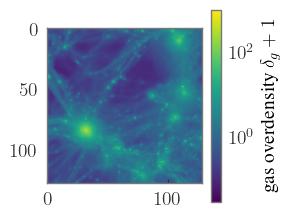

In [ ]:
# assuming nbody[0] contains positive data
plt.imshow(nbody[0][95:223,60:188], norm=LogNorm(vmin=nbody[0].min(), vmax=nbody[0].max()), cmap='magma')
plt.colorbar(label='matter overdensity $\delta + 1$')
plt.show()


# assuming nbody[0] contains positive data
plt.imshow((hydro[0])[95:223,60:188], norm=LogNorm(vmin=nbody[0].min(), vmax=nbody[0].max()), cmap='viridis')
plt.colorbar(label='gas overdensity $\delta_g + 1$')
plt.show()

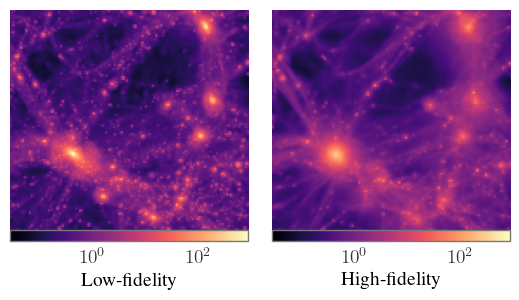

In [21]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, axes = plt.subplots(1, 2, figsize=(5, 3.5))

for ax, data, cmap, label in zip(
    axes,
    [nbody[0], hydro[0]],
    ['magma', 'magma'],
    # [r'Low-fidelity: $N$-Body simulation' +'\n'+r'$\delta + 1$', 'High-fidelity: hydro-simulation gas\n'+r'$\delta_{\rm gas} + 1$']
    ['Low-fidelity', 'High-fidelity']
):
    # draw the image
    im = ax.imshow(
        data[95:223, 55:193],
        norm=LogNorm(vmin=nbody[0].min(), vmax=nbody[0].max()*0.8), interpolation='hermite',
        cmap=cmap
    )
    ax.axis('off')

    # make a horizontal colorbar *below* this Axes, size 5% of its height, pad=0
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("bottom", size="5%", pad=0)
    cb = fig.colorbar(im, cax=cax, orientation='horizontal', label=label)
    cax.xaxis.set_ticks_position('bottom')
    cax.xaxis.set_label_position('bottom')

    

# collapse all margins and gaps
plt.subplots_adjust(
    left=0, right=1, top=1, bottom=0,
    wspace=0.1, hspace=0
)

# plt.savefig('camels_example.png',dpi=300)
plt.savefig('camels_example.pdf', dpi = 400, bbox_inches='tight')

/var/folders/r6/jlzvq0td5mqf05q5jm6fs2vm0000gp/T/ipykernel_83764/3519500633.py:32: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


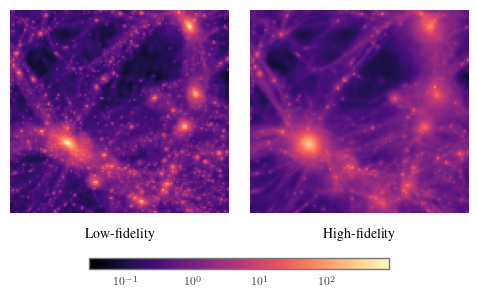

In [ ]:
# Create subplot layout
fig, axes = plt.subplots(1, 2, figsize=(5, 3.5))

# Shared normalization
vmin = min(nbody[0].min(), hydro[0].min())
vmax = max(nbody[0].max(), hydro[0].max()) * 0.8
norm = LogNorm(vmin=vmin, vmax=vmax)

# Plot images
ims = []
labels = ['Low-fidelity', 'High-fidelity']
for ax, data in zip(axes, [nbody[0], hydro[0]]):
    im = ax.imshow(data[95:223, 55:193], norm=norm, cmap='magma', interpolation='hermite')
    ax.axis('off')
    ims.append(im)

# Add single shared horizontal colorbar below both images
cbar_ax = fig.add_axes([0.2, 0.05, 0.6, 0.03])  # [left, bottom, width, height]
cbar = fig.colorbar(ims[0], cax=cbar_ax, orientation='horizontal')
cbar.ax.tick_params(labelsize=8)
# cbar.set_label(r'$\delta + 1$', fontsize=10)

# Add bottom-centered labels under each image
for ax, label in zip(axes, labels):
    ax.text(0.5, -0.08, label, fontsize=10, ha='center', va='top', transform=ax.transAxes)

# Tight layout
plt.subplots_adjust(
    left=0, right=1, top=1, bottom=0.15,
    wspace=0.1, hspace=0
)
fig.tight_layout()

# Save
# plt.savefig('camels_example.pdf', dpi=400, bbox_inches='tight')

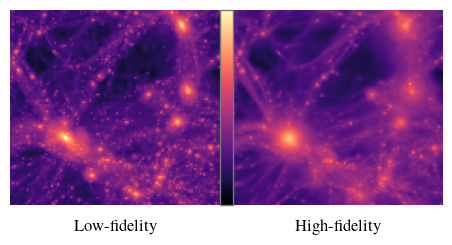

In [68]:
import matplotlib.gridspec as gridspec
fig = plt.figure(figsize=(5, 3.5))
gs = gridspec.GridSpec(1, 3, width_ratios=[1, 0.05, 1], wspace=0.05)

# Shared normalization
vmin = min(nbody[0].min(), hydro[0].min())
vmax = max(nbody[0].max(), hydro[0].max()) * 0.8
norm = LogNorm(vmin=vmin, vmax=vmax)

# Layout parameters
img_width = 0.42
cbar_width = 0.025
total_width = img_width * 2 + cbar_width
left = (1 - total_width) / 2

# Create image axes
ax1 = fig.add_axes([left, 0.1, img_width, 0.8])
ax2 = fig.add_axes([left + img_width + cbar_width, 0.1, img_width, 0.8])
ax1.text(0.5, -0.08, 'Low-fidelity', fontsize=12, ha='center', va='top', transform=ax1.transAxes)
ax2.text(0.5, -0.08, 'High-fidelity', fontsize=12, ha='center', va='top', transform=ax2.transAxes)

# Plot images
im1 = ax1.imshow(nbody[0][95:223, 55:193], cmap='magma', norm=norm, interpolation='hermite')
im2 = ax2.imshow(hydro[0][95:223, 55:193], cmap='magma', norm=norm, interpolation='hermite')
ax1.axis('off')
ax2.axis('off')

# Get exact vertical bounds from ax1
pos1 = ax1.get_position()
y0 = pos1.y0
height = pos1.height
cbar_x = left + img_width

# Add colorbar with exact height alignment
cbar_ax = fig.add_axes([cbar_x, y0, cbar_width, height])
cb = fig.colorbar(im1, cax=cbar_ax, orientation='vertical')

# Remove ticks and labels
cb.ax.set_yticks([])
cb.ax.set_yticklabels([])
cb.set_label('')
plt.savefig('camels_example_2.pdf', dpi=400, bbox_inches='tight')


Text(0.5, -0.03, 'High-fidelity')

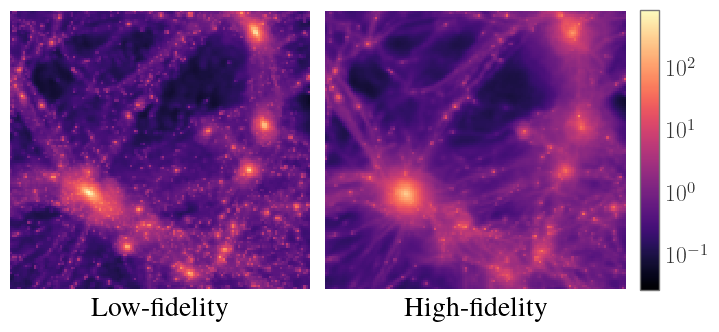

In [7]:


fig = plt.figure(figsize=(7.5, 3.5))

# Define positions explicitly to remove any gap
img_width = 0.4
gap = 0.02
cbar_width = 0.025
left = 0.05
bottom = 0.1
height = 0.8

# ax1, ax2 now have a gap between them
ax1 = fig.add_axes([left, bottom, img_width, height])
ax2 = fig.add_axes([left + img_width + gap, bottom, img_width, height])
cbar_ax = fig.add_axes([left + 2 * img_width + 2 * gap, bottom, cbar_width, height])

# Shared normalization
vmin = min(nbody[0].min(), hydro[0].min())
vmax = max(nbody[0].max(), hydro[0].max()) * 0.8
norm = LogNorm(vmin=vmin, vmax=vmax)

# Plot images
im1 = ax1.imshow(nbody[0][95:223, 55:193], cmap='magma', norm=norm, interpolation='none')
im2 = ax2.imshow(hydro[0][95:223, 55:193], cmap='magma', norm=norm, interpolation='none')
ax1.axis('off')
ax2.axis('off')

# Colorbar
cbar = fig.colorbar(im2, cax=cbar_ax, orientation='vertical')
cbar.ax.tick_params(labelsize=17)

# Bottom labels
ax1.text(0.5, -0.03, 'Low-fidelity', fontsize=20, ha='center', va='top', transform=ax1.transAxes)
ax2.text(0.5, -0.03, 'High-fidelity', fontsize=20, ha='center', va='top', transform=ax2.transAxes)

# Save
# plt.savefig("camels_example.pdf", dpi=300, bbox_inches='tight')


In [32]:
fig.savefig("camels_example_3.png", dpi=500, bbox_inches='tight')

In [15]:
nbody[0][95:223, 55:193].shape

(128, 138)

In [16]:
hydro[0][95:223, 55:193].shape

(128, 138)

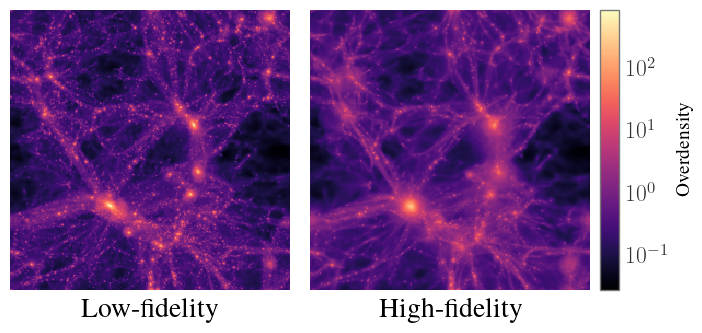

In [16]:
fig = plt.figure(figsize=(7.5, 3.5))

# Define positions explicitly to remove any gap
img_width = 0.4
gap = 0.00
cbar_width = 0.025
left = 0.05
bottom = 0.1
height = 0.8

# ax1, ax2 now have a gap between them
ax1 = fig.add_axes([left, bottom, img_width, height])
ax2 = fig.add_axes([left + img_width + gap, bottom, img_width, height])
cbar_ax = fig.add_axes([left + 2 * img_width + 2 * gap, bottom, cbar_width, height])

# Shared normalization
vmin = min(nbody[0].min(), hydro[0].min())
vmax = max(nbody[0].max(), hydro[0].max()) * 0.8
norm = LogNorm(vmin=vmin, vmax=vmax)

# Plot images
im1 = ax1.imshow(nbody[0], cmap='magma', norm=norm, interpolation='none')
im2 = ax2.imshow(hydro[0], cmap='magma', norm=norm, interpolation='none')
ax1.axis('off')
ax2.axis('off')

# Colorbar
cbar = fig.colorbar(im2, cax=cbar_ax, orientation='vertical', label = "Overdensity")
cbar.ax.tick_params(labelsize=17)

# Bottom labels
ax1.text(0.5, -0.03, 'Low-fidelity', fontsize=20, ha='center', va='top', transform=ax1.transAxes)
ax2.text(0.5, -0.03, 'High-fidelity', fontsize=20, ha='center', va='top', transform=ax2.transAxes)

# Save
plt.savefig("camels_example_with_label.pdf", dpi=300, bbox_inches='tight')

In [ ]:
fig.savefig("camels_example_2.png", dpi=500, bbox_inches='tight')